In [46]:
import pandas as pd
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("london_flows.csv")
data.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


I.

In [41]:
# read only station data
g_data = nx.from_pandas_edgelist(data, 'station_origin', 'station_destination')

In [39]:
# Print information about the Graph
print(nx.info(g_data))

Graph with 399 nodes and 31718 edges


/tmp/ipykernel_18356/1215017784.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g_data))


I.1

In [5]:
# degree centrality
deg_t =nx.degree_centrality(g_data)
nx.set_node_attributes(g_data,deg_t,'degree_t')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=g_data.nodes())
df['degree_t'] = pd.Series(nx.get_node_attributes(g_data, 'degree_t'))
df_sorted_deg_t = df.sort_values(["degree_t"], ascending=False)
df_sorted_deg_t[0:10]

,degree_t
Stratford,0.922111
Highbury & Islington,0.806533
Whitechapel,0.781407
West Brompton,0.776382
Canada Water,0.771357
Canary Wharf,0.771357
Liverpool Street,0.768844
Bank and Monument,0.766332
Richmond,0.766332
Canning Town,0.763819


In [6]:
### Topological betweenness centrality:
#Let us compute the betweenness centrality for the network, without using weights:
bet_t=nx.betweenness_centrality(g_data, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_data,bet_t,'betweenness_t')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=g_data.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(g_data, 'betweenness_t'))
df_sorted_bet_t = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet_t[0:10]

,betweenness_t
Stratford,7785.967073
Liverpool Street,2710.377160
Canary Wharf,2208.627931
Bank and Monument,2208.627931
Canning Town,2192.848026
West Ham,1939.641831
Highbury & Islington,1818.904025
Whitechapel,1554.965946
Canada Water,1413.977663
Shadwell,1348.588902


In [7]:
#topological closeness centrality
clos_t=nx.closeness_centrality(g_data)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_data,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=g_data.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(g_data, 'closeness_t'))
df_sorted_clos_t = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos_t[0:10]

,closeness_t
Stratford,0.927739
Highbury & Islington,0.836134
Whitechapel,0.820619
West Brompton,0.817248
Canada Water,0.813906
Richmond,0.810591
Canary Wharf,0.810591
Bank and Monument,0.810591
Liverpool Street,0.808943
Canning Town,0.808943


I.3 non-sequential

In [27]:
Ga=g_data.copy()
Gb=g_data.copy()
Gc=g_data.copy()

In [9]:
values_sorted = sorted(deg_t.items(), key=itemgetter(1), reverse=True)
sorted_ten_deg=[e for e,v in values_sorted[:10]]
sorted_ten_deg

['Stratford',
 'Highbury & Islington',
 'Whitechapel',
 'West Brompton',
 'Canary Wharf',
 'Canada Water',
 'Liverpool Street',
 'Bank and Monument',
 'Richmond',
 'Canning Town']

In [10]:
values_sorted = sorted(bet_t.items(), key=itemgetter(1), reverse=True)
sorted_ten_bet=[e for e,v in values_sorted[:10]]
sorted_ten_bet

['Stratford',
 'Liverpool Street',
 'Bank and Monument',
 'Canary Wharf',
 'Canning Town',
 'West Ham',
 'Highbury & Islington',
 'Whitechapel',
 'Canada Water',
 'Shadwell']

In [11]:
values_sorted = sorted(clos_t.items(), key=itemgetter(1), reverse=True)
sorted_ten_clos=[e for e,v in values_sorted[:10]]
sorted_ten_clos

['Stratford',
 'Highbury & Islington',
 'Whitechapel',
 'West Brompton',
 'Canada Water',
 'Bank and Monument',
 'Canary Wharf',
 'Richmond',
 'Canning Town',
 'Liverpool Street']

In [12]:
Ga_A = []
Ga_D = []
for node in sorted_ten_deg[:10]:
    Ga.remove_node(node)
    avg_path_length = nx.average_shortest_path_length(Ga)
    Ga_A.append(avg_path_length)
    network_diameter = nx.diameter(Ga)
    Ga_D.append(network_diameter)
    print("Node", node, "removed")
    print("Average shortest path length:", avg_path_length)
    print("Network diameter:", network_diameter)

Node Stratford removed
Average shortest path length: 1.6399756971254256
Network diameter: 3
Node Highbury & Islington removed
Average shortest path length: 1.6423173803526447
Network diameter: 3
Node Whitechapel removed
Average shortest path length: 1.64445723053318
Network diameter: 3
Node West Brompton removed
Average shortest path length: 1.6465848486795605
Network diameter: 3
Node Canary Wharf removed
Average shortest path length: 1.6486741323413545
Network diameter: 3
Node Canada Water removed
Average shortest path length: 1.6624344394246249
Network diameter: 4
Node Liverpool Street removed
Average shortest path length: 1.7372253249125738
Network diameter: 5
Node Bank and Monument removed
Average shortest path length: 1.740153452685422
Network diameter: 5
Node Richmond removed
Average shortest path length: 1.7427987607936195
Network diameter: 5
Node Canning Town removed
Average shortest path length: 1.75757294675748
Network diameter: 5


In [28]:
Gb_A = []
Gb_D = []
for i in range(10):
    node_to_remove = sorted_ten_bet[i]
    Gb.remove_node(node_to_remove)
    largest_cc = max(nx.connected_components(Gb), key=len)
    subgraph = Gb.subgraph(largest_cc)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    Gb_A.append(avg_path_length)
    diameter = nx.diameter(subgraph)
    Gb_D.append(diameter)
    bet_t = nx.betweenness_centrality(subgraph)
    
    print(f"Node {node_to_remove} removed")
    print(f"Number of nodes: {len(subgraph.nodes)}")
    print(f"Average shortest path length: {avg_path_length}")
    print(f"Diameter: {diameter}")
    print("")
    
    if len(subgraph.nodes) == 0:
        print("Graph is empty!")
        break

Node Stratford removed
Number of nodes: 398
Average shortest path length: 1.6399756971254256
Diameter: 3

Node Liverpool Street removed
Number of nodes: 397
Average shortest path length: 1.7130371727349056
Diameter: 4

Node Bank and Monument removed
Number of nodes: 396
Average shortest path length: 1.715317734305076
Diameter: 4

Node Canary Wharf removed
Number of nodes: 395
Average shortest path length: 1.718113474265887
Diameter: 4

Node Canning Town removed
Number of nodes: 394
Average shortest path length: 1.7324369357151161
Diameter: 5

Node West Ham removed
Number of nodes: 393
Average shortest path length: 1.8552084956119852
Diameter: 5

Node Highbury & Islington removed
Number of nodes: 392
Average shortest path length: 1.858382483428154
Diameter: 5

Node Whitechapel removed
Number of nodes: 391
Average shortest path length: 1.8615122303101843
Diameter: 5

Node Canada Water removed
Number of nodes: 390
Average shortest path length: 1.8770944565289038
Diameter: 5

Node Shadwell

In [14]:
Gc_A = []
Gc_D = []
for node in sorted_ten_clos[:10]:
    Gc.remove_node(node)
    avg_path_length = nx.average_shortest_path_length(Gc)
    Gc_A.append(avg_path_length)
    network_diameter = nx.diameter(Gc)
    Gc_D.append(network_diameter)
    print("Node", node, "removed")
    print("Average shortest path length:", avg_path_length)
    print("Network diameter:", network_diameter)

Node Stratford removed
Average shortest path length: 1.6399756971254256
Network diameter: 3
Node Highbury & Islington removed
Average shortest path length: 1.6423173803526447
Network diameter: 3
Node Whitechapel removed
Average shortest path length: 1.64445723053318
Network diameter: 3
Node West Brompton removed
Average shortest path length: 1.6465848486795605
Network diameter: 3
Node Canada Water removed
Average shortest path length: 1.660273052530967
Network diameter: 4
Node Bank and Monument removed
Average shortest path length: 1.6624344394246249
Network diameter: 4
Node Canary Wharf removed
Average shortest path length: 1.665118221201524
Network diameter: 4
Node Richmond removed
Average shortest path length: 1.6674929503574005
Network diameter: 4
Node Canning Town removed
Average shortest path length: 1.6819853668182716
Network diameter: 4
Node Liverpool Street removed
Average shortest path length: 1.75757294675748
Network diameter: 5


I.3 sequential

In [42]:
Gd=g_data.copy()
Ge=g_data.copy()
Gf=g_data.copy()

In [16]:
Gd_A = []
Gd_D = []
for i in range(10):
    node = max(deg_t, key=deg_t.get)
    Gd.remove_node(node)
    avg_path_length = nx.average_shortest_path_length(Gd)
    Gd_A.append(avg_path_length)
    network_diameter = nx.diameter(Gd)
    Gd_D.append(network_diameter)
    deg_t = nx.degree_centrality(Gd)
    print("Node", node, "removed")
    print("Average shortest path length:", avg_path_length)
    print("Network diameter:", network_diameter)

Node Stratford removed
Average shortest path length: 1.6399756971254256
Network diameter: 3
Node Highbury & Islington removed
Average shortest path length: 1.6423173803526447
Network diameter: 3
Node Whitechapel removed
Average shortest path length: 1.64445723053318
Network diameter: 3
Node West Brompton removed
Average shortest path length: 1.6465848486795605
Network diameter: 3
Node Canary Wharf removed
Average shortest path length: 1.6486741323413545
Network diameter: 3
Node Canada Water removed
Average shortest path length: 1.6624344394246249
Network diameter: 4
Node Liverpool Street removed
Average shortest path length: 1.7372253249125738
Network diameter: 5
Node Bank and Monument removed
Average shortest path length: 1.740153452685422
Network diameter: 5
Node Richmond removed
Average shortest path length: 1.7427987607936195
Network diameter: 5
Node Canning Town removed
Average shortest path length: 1.75757294675748
Network diameter: 5


In [43]:
Ge_A = []
Ge_D = []
for i in range(10):
    node_to_remove = max(bet_t, key=bet_t.get)
    Ge.remove_node(node_to_remove)
    largest_cc = max(nx.connected_components(Ge), key=len)
    subgraph = Ge.subgraph(largest_cc)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    Ge_A.append(avg_path_length)
    diameter = nx.diameter(subgraph)
    Ge_D.append(diameter)
    bet_t = nx.betweenness_centrality(subgraph)
    
    print(f"Node {node_to_remove} removed")
    print(f"Number of nodes: {len(subgraph.nodes)}")
    print(f"Average shortest path length: {avg_path_length}")
    print(f"Diameter: {diameter}")
    print("")
    
    if len(subgraph.nodes) == 0:
        print("Graph is empty!")
        break

Node Stratford removed
Number of nodes: 398
Average shortest path length: 1.6399756971254256
Diameter: 3

Node Liverpool Street removed
Number of nodes: 397
Average shortest path length: 1.7130371727349056
Diameter: 4

Node Upminster removed
Number of nodes: 383
Average shortest path length: 1.6006178830669966
Diameter: 3

Node Bank and Monument removed
Number of nodes: 382
Average shortest path length: 1.602671393824463
Diameter: 3

Node Canary Wharf removed
Number of nodes: 381
Average shortest path length: 1.6052769719574527
Diameter: 3

Node Canning Town removed
Number of nodes: 380
Average shortest path length: 1.6198861269268157
Diameter: 4

Node West Ham removed
Number of nodes: 379
Average shortest path length: 1.744272731080119
Diameter: 4

Node Shadwell removed
Number of nodes: 339
Average shortest path length: 1.497285786598244
Diameter: 3

Node Highbury & Islington removed
Number of nodes: 338
Average shortest path length: 1.499973662493635
Diameter: 3

Node Whitechapel rem

In [44]:
Gf_A = []
Gf_D = []
for i in range(10):
    node = max(clos_t, key=clos_t.get)
    Gf.remove_node(node)
    avg_path_length = nx.average_shortest_path_length(Gf)
    Gf_A.append(avg_path_length)
    network_diameter = nx.diameter(Gf)
    Gf_D.append(network_diameter)
    clos_t = nx.closeness_centrality(Gf)
    print("Node", node, "removed")
    print("Average shortest path length:", avg_path_length)
    print("Network diameter:", network_diameter)

Node Stratford removed
Average shortest path length: 1.6399756971254256
Network diameter: 3
Node Highbury & Islington removed
Average shortest path length: 1.6423173803526447
Network diameter: 3
Node Whitechapel removed
Average shortest path length: 1.64445723053318
Network diameter: 3
Node West Brompton removed
Average shortest path length: 1.6465848486795605
Network diameter: 3
Node Canada Water removed
Average shortest path length: 1.660273052530967
Network diameter: 4
Node Bank and Monument removed
Average shortest path length: 1.6624344394246249
Network diameter: 4
Node Canary Wharf removed
Average shortest path length: 1.665118221201524
Network diameter: 4
Node Richmond removed
Average shortest path length: 1.6674929503574005
Network diameter: 4
Node Canning Town removed
Average shortest path length: 1.6819853668182716
Network diameter: 4
Node Liverpool Street removed
Average shortest path length: 1.75757294675748
Network diameter: 5


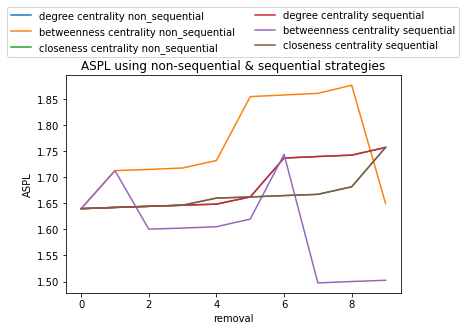

In [47]:
plt.plot(Ga_A,label='degree centrality non_sequential')
plt.plot(Gb_A,label='betweenness centrality non_sequential')
plt.plot(Gc_A,label='closeness centrality non_sequential')
plt.plot(Gd_A,label='degree centrality sequential')
plt.plot(Ge_A,label='betweenness centrality sequential')
plt.plot(Gf_A,label='closeness centrality sequential')
plt.legend(loc='center',bbox_to_anchor=(0.5,1.2),ncol=2)
plt.xlabel('removal')
plt.ylabel('ASPL')
plt.title('ASPL using non-sequential & sequential strategies')
plt.show()

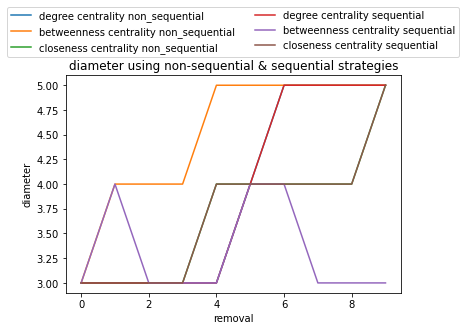

In [48]:
plt.plot(Ga_D,label='degree centrality non_sequential')
plt.plot(Gb_D,label='betweenness centrality non_sequential')
plt.plot(Gc_D,label='closeness centrality non_sequential')
plt.plot(Gd_D,label='degree centrality sequential')
plt.plot(Ge_D,label='betweenness centrality sequential')
plt.plot(Gf_D,label='closeness centrality sequential')
plt.legend(loc='center',bbox_to_anchor=(0.5,1.2),ncol=2)
plt.xlabel('removal')
plt.ylabel('diameter')
plt.title('diameter using non-sequential & sequential strategies')
plt.show()

II

In [49]:
# read station data with flows
g2_data = nx.from_pandas_edgelist(data, 'station_origin', 'station_destination','flows')

II.1

In [50]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_w=nx.betweenness_centrality(g2_data,weight='flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(g2_data,bet_w,'betweenness_w')
# To dataframe using the nodes as the index
df = pd.DataFrame(index=g2_data.nodes())
df['betweenness_w'] = pd.Series(nx.get_node_attributes(g2_data, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,betweenness_w
West Ham,9.694526e+93
West Brompton,5.748984e+93
Shepherd's Bush,2.825892e+93
Kew Gardens,1.637767e+93
Surrey Quays,8.273506e+92
Kenton,6.373616e+92
Richmond,6.086318e+92
Willesden Junction,2.206631e+92
Kentish Town West,1.419265e+92
Stratford,1.076285e+92


In [51]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(g2_data, distance='flows')
# We can add these values to the nodes attributes:
nx.set_node_attributes(g2_data,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=g2_data.nodes())
df['closeness_w'] = pd.Series(nx.get_node_attributes(g2_data, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,closeness_w
Abbey Road,5.605634
Ruislip Manor,5.605634
Swiss Cottage,5.605634
Sudbury Town,5.605634
Sudbury Hill,5.605634
Stockwell,5.605634
Stepney Green,5.605634
Stamford Brook,5.605634
St. Paul's,5.605634
St. John's Wood,5.605634


II.2&3

In [52]:
Gg=g2_data.copy()

In [53]:
values_sorted = sorted(bet_w.items(), key=itemgetter(1), reverse=True)
sorted_three_bet=[e for e,v in values_sorted[:3]]
sorted_three_bet

['West Ham', 'West Brompton', "Shepherd's Bush"]

without adjust:

In [54]:
for i in range(3):
    node_to_remove = sorted_three_bet[i]
    Gg.remove_node(node_to_remove)
    largest_cc = max(nx.connected_components(Gg), key=len)
    subgraph = Gg.subgraph(largest_cc)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    diameter = nx.diameter(subgraph)
    bet_t = nx.betweenness_centrality(subgraph)
    
    print(f"Node {node_to_remove} removed")
    print(f"Number of nodes: {len(subgraph.nodes)}")
    print(f"Average shortest path length: {avg_path_length}")
    print(f"Diameter: {diameter}")
    print("")
    
    if len(subgraph.nodes) == 0:
        print("Graph is empty!")
        break

Node West Ham removed
Number of nodes: 398
Average shortest path length: 1.614027315418402
Diameter: 3

Node West Brompton removed
Number of nodes: 397
Average shortest path length: 1.6159962343841436
Diameter: 3

Node Shepherd's Bush removed
Number of nodes: 396
Average shortest path length: 1.617836593785961
Diameter: 3



adjust:

In [55]:
Gh=g2_data.copy()

In [56]:
for i in range(3):
    node_to_remove = sorted_three_bet[i]
    Gh.remove_node(node_to_remove)
    largest_cc = max(nx.connected_components(Gh), key=len)
    subgraph = Gh.subgraph(largest_cc)
    weighted_avg_path_length = nx.average_shortest_path_length(subgraph,weight='flows')
    path_lengths = dict(nx.all_pairs_dijkstra_path_length(subgraph, weight='flows'))
    weighted_diameter = max(max(lengths.values()) for lengths in path_lengths.values())
    
    print(f"Node {node_to_remove} removed")
    print(f"Number of nodes: {len(subgraph.nodes)}")
    print(f"Adjusted average shortest path length: {weighted_avg_path_length}")
    print(f"Adjusted diameter: {weighted_diameter}")
    print("")
    
    if len(subgraph.nodes) == 0:
        print("Graph is empty!")
        break

Node West Ham removed
Number of nodes: 398
Adjusted average shortest path length: 0.35601179702036634
Adjusted diameter: 27

Node West Brompton removed
Number of nodes: 397
Adjusted average shortest path length: 0.35690659746075365
Adjusted diameter: 27

Node Shepherd's Bush removed
Number of nodes: 396
Adjusted average shortest path length: 0.35780590717299576
Adjusted diameter: 27



III.2

In [57]:
data = data[data['population'] != 0]

In [58]:
data = data[data['jobs'] != 0]

In [59]:
data = data[data['distance'] != 0]

In [60]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    data[f"log_{x}"] = np.log(data[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=data, 
                  family=sm.families.Poisson()).fit()

In [61]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61409
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2785e+06
Date:                Fri, 28 Apr 2023   Deviance:                   2.3848e+06
Time:                        10:58:32   Pearson chi2:                 4.76e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.7475      0.014   -273.

In [62]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
data["unconstrainedEst"] = np.exp(K 
                                       + alpha*data["log_population"] 
                                       + gamma*data["log_jobs"] 
                                       - beta*data["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
data["fitted"] = predictions_summary_frame["mean"]

In [63]:
#round the numbers so that we don't get a half of a person
data["unconstrainedEst"] = round(data["unconstrainedEst"], 0)
#convert to integers
data["unconstrainedEst"] = data["unconstrainedEst"].astype(int)
#check that the sum of these estimates make sense
sum(data["unconstrainedEst"])

1542355

In [64]:
# unconstrained model data matrix
datamat = data.pivot_table(values ="unconstrainedEst", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
datamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,333
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3862
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6107
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3707
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2648


In [65]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

CalcRSqaured(data["flows"], data["unconstrainedEst"])

0.3211903577361867

In [66]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

CalcRMSE(data["flows"], data["unconstrainedEst"])

108.334

In [67]:
# original flow matrix
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
datamat_ori = pd.pivot_table(data, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
datamat_ori

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


IV.1

In [68]:
data.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst,fitted
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,50,49.617996
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1,0.937195
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,2,2.121375
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,53,53.297014
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,32,32.208586


In [69]:
def new_job(row):
    if row["station_origin"] == "Canary Wharf":
        val = row["jobs"]*0.5
    else:
        val = row["jobs"]
    return val

#create a variable called Oi2_origpop_scenario while applying the new_pop function
data["job_ScenarioA"] = data.apply(new_job, axis =1)

#check the result to make sure it has been applied
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst,fitted,job_ScenarioA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,50,49.617996,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1,0.937195,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,2,2.121375,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,53,53.297014,58772.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,32,32.208586,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,2,2.340152,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.395262,6.739337,8.249276,3,2.524914,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,6.395262,7.466228,9.048280,3,2.668661,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.395262,6.745236,8.784484,2,1.817327,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.395262,6.415097,8.283576,2,1.931266,611.0


In [70]:
#take the variables and produce logarithms of them
x_variables = ["population", "job_ScenarioA", "distance"]
log_x_vars = []
for x in x_variables:
    data[f"log_{x}"] = np.log(data[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_job_ScenarioA + log_distance'

#run the regression
ScenarioA = smf.glm(formula = formula, 
                  data=data, 
                  family=sm.families.Poisson()).fit()

In [71]:
#extract the summary of the constrained model
print(ScenarioA.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61409
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2800e+06
Date:                Fri, 28 Apr 2023   Deviance:                   2.3877e+06
Time:                        10:59:07   Pearson chi2:                 4.76e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.7374      0.01

In [72]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
data["ScenarioAEst"] = np.exp(K 
                                       + alpha*data["log_population"] 
                                       + gamma*data["log_job_ScenarioA"] 
                                       - beta*data["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
data["fitted"] = predictions_summary_frame["mean"]

In [73]:
#round the numbers so that we don't get a half of a person
data["ScenarioAEst"] = round(data["ScenarioAEst"], 0)
#convert to integers
data["ScenarioAEst"] = data["ScenarioAEst"].astype(int)
#check that the sum of these estimates make sense
sum(data["ScenarioAEst"])

1536126

In [74]:
#turn it into a little matrix and have a look at your handy work
ScenarioAmat = data.pivot_table(values ="ScenarioAEst", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ScenarioAmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,333
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3862
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6107
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3707
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2648


In [76]:
# flow change of the system before adjust
difference_scenarioA = data['flows'].sum() - data['ScenarioAEst'].sum()
difference_scenarioA_percentage = (difference_scenarioA / data['flows'].sum()) * 100
print(f'flow changes in ScenarioA: {difference_scenarioA}')
print(f'flow changes in ScenarioA (%) : {difference_scenarioA_percentage:.2f}%')

flow changes in ScenarioA: 6157
flow changes in ScenarioA (%) : 0.40%


In [80]:
scaling_factor = sum(data["flows"]) / sum(data["ScenarioAEst"])

In [81]:
scaling_factor

1.004008134749363

In [82]:
adjusted_ScenarioAmat = ScenarioAmat * scaling_factor

In [83]:
adjusted_ScenarioAmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.020041,3.935712e+02
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,3.343347e+02
Acton Town,NaN,NaN,NaN,21.084171,21.084171,NaN,7.028057,1.004008,NaN,22.088179,...,18.072146,3.012024,6.024049,11.044089,NaN,2.008016,NaN,3.012024,NaN,3.877479e+03
Aldgate,NaN,NaN,7.028057,NaN,81.324659,NaN,NaN,1.004008,NaN,47.188382,...,14.056114,NaN,8.032065,6.024049,NaN,3.012024,NaN,3.012024,NaN,6.131478e+03
Aldgate East,NaN,NaN,7.028057,85.340691,NaN,NaN,3.012024,1.004008,NaN,48.192390,...,14.056114,3.012024,8.032065,7.028057,NaN,3.012024,NaN,3.012024,NaN,6.495933e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.028057,26.104212,28.112228,NaN,NaN,NaN,NaN,25.100203,...,14.056114,NaN,8.032065,NaN,NaN,NaN,NaN,NaN,NaN,3.721858e+03
Woodgrange Park,NaN,1.004008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.224850e+01
Woodside Park,NaN,NaN,5.020041,18.072146,18.072146,NaN,2.008016,NaN,NaN,21.084171,...,11.044089,NaN,6.024049,NaN,NaN,NaN,NaN,NaN,NaN,2.658614e+03


In [84]:
data['ScenarioAEst'] = scaling_factor * data['ScenarioAEst']

In [85]:
data.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst,fitted,job_ScenarioA,log_job_ScenarioA,ScenarioAEst
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,50,49.617996,78549.0,11.271478,50.200407
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1,0.937195,442.0,6.091310,1.004008
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,2,2.121375,665.0,6.499787,2.008016
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,53,53.297014,58772.0,10.981421,53.212431
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,32,32.208586,15428.0,9.643939,32.128260


In [86]:
CanaryWharf = data[data['station_destination'] == 'Canary Wharf']
difference_scenarioA_CanaryWharf = CanaryWharf['flows'].sum() - CanaryWharf['ScenarioAEst'].sum()
difference_scenarioA_CanaryWharf_percentage = (difference_scenarioA_CanaryWharf / CanaryWharf['flows'].sum() * 100)
print(f'flow changes in Canary Wharf: {difference_scenarioA_CanaryWharf}')
print(f'flow changes in Canary Wharf(%) : {difference_scenarioA_CanaryWharf_percentage:.2f}%')

flow changes in Canary Wharf: 14753.271348183676
flow changes in Canary Wharf(%) : 25.10%


IV.2

In [87]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]*1.01

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
data["ScenarioBEst_1"] = np.exp(K 
                                       + alpha*data["log_population"] 
                                       + gamma*data["log_jobs"] 
                                       - beta*data["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
data["fitted"] = predictions_summary_frame["mean"]

In [88]:
#round the numbers so that we don't get a half of a person
data["ScenarioBEst_1"] = round(data["ScenarioBEst_1"], 0)
#convert to integers
data["ScenarioBEst_1"] = data["ScenarioBEst_1"].astype(int)
#check that the sum of these estimates make sense
sum(data["ScenarioBEst_1"])

1460160

In [89]:
#turn it into a little matrix and have a look at your handy work
ScenarioBmat_1 = data.pivot_table(values ="ScenarioBEst_1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ScenarioBmat_1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,373
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,319
Acton Town,NaN,NaN,NaN,19.0,20.0,NaN,7.0,1.0,NaN,21.0,...,17.0,3.0,6.0,11.0,NaN,2.0,NaN,2.0,NaN,3642
Aldgate,NaN,NaN,6.0,NaN,77.0,NaN,NaN,1.0,NaN,45.0,...,13.0,NaN,7.0,6.0,NaN,3.0,NaN,3.0,NaN,5815
Aldgate East,NaN,NaN,7.0,82.0,NaN,NaN,2.0,1.0,NaN,46.0,...,14.0,2.0,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,6.0,25.0,27.0,NaN,NaN,NaN,NaN,23.0,...,13.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3486
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
Woodside Park,NaN,NaN,5.0,17.0,17.0,NaN,2.0,NaN,NaN,19.0,...,10.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2492


In [90]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]*1.5

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
data["ScenarioBEst_2"] = np.exp(K 
                                       + alpha*data["log_population"] 
                                       + gamma*data["log_jobs"] 
                                       - beta*data["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
data["fitted"] = predictions_summary_frame["mean"]

In [91]:
#round the numbers so that we don't get a half of a person
data["ScenarioBEst_2"] = round(data["ScenarioBEst_2"], 0)
#convert to integers
data["ScenarioBEst_2"] = data["ScenarioBEst_2"].astype(int)
#check that the sum of these estimates make sense
sum(data["ScenarioBEst_2"])

99564

In [92]:
#turn it into a little matrix and have a look at your handy work
ScenarioBmat_2 = data.pivot_table(values ="ScenarioBEst_2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ScenarioBmat_2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,32
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,13
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,1.0,0.0,NaN,1.0,...,1.0,0.0,0.0,1.0,NaN,0.0,NaN,0.0,NaN,199
Aldgate,NaN,NaN,0.0,NaN,8.0,NaN,NaN,0.0,NaN,4.0,...,1.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,483
Aldgate East,NaN,NaN,0.0,9.0,NaN,NaN,0.0,0.0,NaN,4.0,...,1.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,161
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,0.0,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,112


In [93]:
differenceB1 = data['flows'].sum() - data['ScenarioBEst_1'].sum()
differenceB1_percentage = (differenceB1 / data['flows'].sum()) * 100
print(f'flow changes in ScenarioB1: {differenceB1}')
print(f'flow changes in ScenarioB1 (%) : {differenceB1_percentage:.2f}%')

flow changes in ScenarioB1: 82123
flow changes in ScenarioB1 (%) : 5.32%


In [96]:
differenceB2 = data['flows'].sum() - data['ScenarioBEst_2'].sum()
differenceB2_percentage = (differenceB2 / data['flows'].sum()) * 100
print(f'flow changes in ScenarioB2: {differenceB2}')
print(f'flow changes in ScenarioB2 (%) : {differenceB2_percentage:.2f}%')

flow changes in ScenarioB2: 1442719
flow changes in ScenarioB2 (%) : 93.54%


               station_origin  flow_change_a
54               Canary Wharf   -6193.123186
364                  Waterloo     262.364484
326                 Stratford     162.650108
355                  Victoria     156.629890
15          Bank and Monument     156.092800
212          Liverpool Street     153.535610
213             London Bridge     152.164828
197  King's Cross St. Pancras     133.166269
53               Canada Water     102.656347
116                    Euston      96.784430


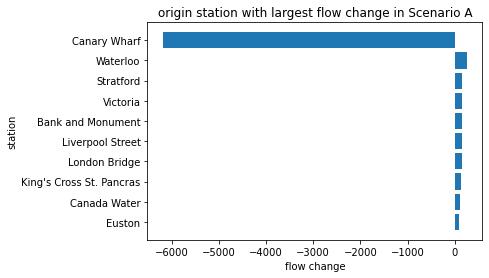

In [114]:
data['flow_change_a'] = data['ScenarioAEst'] - data['unconstrainedEst']
origin_flow_change_a = data.groupby('station_origin')['flow_change_a'].sum().reset_index()
origin_flow_change_a_top10 = origin_flow_change_a.reindex(origin_flow_change_a['flow_change_a'].abs().sort_values(ascending=False).index).head(10)
print(origin_flow_change_a_top10)
plt.figure()
plt.barh(origin_flow_change_a_top10['station_origin'], origin_flow_change_a_top10['flow_change_a'])
plt.xlabel('flow change')
plt.ylabel('station')
plt.title(f'origin station with largest flow change in Scenario A')
plt.gca().invert_yaxis()
plt.show()

In [123]:
# decrease in flows:b1
data['flow_decrease_b1'] = data['unconstrainedEst'] - data['ScenarioBEst_1']
origin_flow_decrease_b1 = data.groupby('station_origin')['flow_decrease_b1'].sum().reset_index()
origin_flow_decrease_b1_top5 = origin_flow_decrease_b1.reindex(origin_flow_decrease_b1['flow_decrease_b1'].abs().sort_values(ascending=False).index).head(5)
print(origin_flow_decrease_b1_top5)
# increase in flows:b1
origin_flow_increase_b1 = data.groupby('station_origin')['flow_decrease_b1'].sum().reset_index()
origin_flow_increase_b1_top5 = origin_flow_increase_b1.reindex(origin_flow_increase_b1['flow_decrease_b1'].abs().sort_values(ascending=True).index).head(5)
print(origin_flow_increase_b1_top5)

        station_origin  flow_decrease_b1
364           Waterloo              3247
326          Stratford              2218
355           Victoria              1961
213      London Bridge              1891
15   Bank and Monument              1889
            station_origin  flow_decrease_b1
66                Cheshunt                 1
113           Emerson Park                 1
301        South Hampstead                 2
292              Shenfield                 2
210  Leytonstone High Road                 2


In [124]:
# decrease in flows:b2
data['flow_decrease_b2'] = data['unconstrainedEst'] - data['ScenarioBEst_2']
origin_flow_decrease_b2 = data.groupby('station_origin')['flow_decrease_b2'].sum().reset_index()
origin_flow_decrease_b2_top5 = origin_flow_decrease_b2.reindex(origin_flow_decrease_b2['flow_decrease_b2'].abs().sort_values(ascending=False).index).head(5)
print(origin_flow_decrease_b2_top5)
# increase in flows:b2
origin_flow_increase_b2 = data.groupby('station_origin')['flow_decrease_b2'].sum().reset_index()
origin_flow_increase_b2_top5 = origin_flow_increase_b2.reindex(origin_flow_increase_b2['flow_decrease_b2'].abs().sort_values(ascending=True).index).head(5)
print(origin_flow_increase_b2_top5)

        station_origin  flow_decrease_b2
364           Waterloo             60161
326          Stratford             38125
355           Victoria             36074
15   Bank and Monument             35570
212   Liverpool Street             35035
      station_origin  flow_decrease_b2
113     Emerson Park                 7
292        Shenfield                23
66          Cheshunt                27
301  South Hampstead                48
47            Bushey                50
